In [2]:
#importing Libraies
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


/opt/anaconda3/envs/python_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Convert USD to Ruppess

Convert the salary_year_avg from USD to INR using forex-python  

In [4]:
df_ds_in = df[(df['job_country'] == 'India') & (df['job_title'] == 'Data Scientist')].copy()

#drop NAN values from salary_year_avg
df_ds_in = df_ds_in.dropna(subset=['salary_year_avg'])

In [5]:
from forex_python.converter import CurrencyRates

# Display floats normally (not in scientific notation)
pd.options.display.float_format = '{:,.2f}'.format

#Initialize the converter
c = CurrencyRates()

# Get exchange rate once
rate = c.get_rate('USD', 'INR')

#Convert to USD to INR
df_ds_in['salary_ruppe'] = (df_ds_in['salary_year_avg'] * rate).round(0).astype(int)
df_ds_in

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_ruppe
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,"157,500.00",NaN,Silent Eight,"[python, sql, bash, postgresql, pandas, pyspar...","{'async': ['jira', 'confluence'], 'databases':...",13492411
27440,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-15 13:27:09,False,False,India,year,"157,500.00",NaN,"AppZen, Inc.","[python, r]","{'programming': ['python', 'r']}",13492411
30999,Data Scientist,Data Scientist,"Noida, Uttar Pradesh, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:07,False,False,India,year,"157,500.00",NaN,HashiCorp,"[python, aws, numpy, pandas, tensorflow, pytor...","{'cloud': ['aws'], 'libraries': ['numpy', 'pan...",13492411
98605,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-11-01 00:09:34,False,False,India,year,"170,575.00",NaN,KONE,"[python, sql, aws, databricks, jira, confluence]","{'async': ['jira', 'confluence'], 'cloud': ['a...",14612495
163188,Data Scientist,Data Scientist,"Chennai, Tamil Nadu, India",via Ai-Jobs.net,Full-time,False,India,2023-07-04 15:12:51,False,False,India,year,"157,500.00",NaN,Sutherland,[sheets],{'analyst_tools': ['sheets']},13492411
174296,Data Scientist,Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-13 15:19:39,False,False,India,year,"157,500.00",NaN,Ethos,"[r, python]","{'programming': ['r', 'python']}",13492411
187823,Data Scientist,Data Scientist,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-06-19 15:28:44,False,False,India,year,"157,500.00",NaN,DAZN,"[sql, java, python, r, excel]","{'analyst_tools': ['excel'], 'programming': ['...",13492411
229134,Data Scientist,Data Scientist,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-01-26 07:13:28,False,False,India,year,"157,500.00",NaN,Syngenta Group,"[python, r]","{'programming': ['python', 'r']}",13492411
295619,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-12-23 17:09:09,False,False,India,year,"162,500.00",NaN,Gartner,"[python, azure, scikit-learn, pytorch, keras]","{'cloud': ['azure'], 'libraries': ['scikit-lea...",13920741
309209,Data Scientist,Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-08-07 17:52:51,False,False,India,year,"132,500.00",NaN,Tesco Bengaluru,"[python, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin...",11350758


#### Clean Data
Filters the original dataset to only get rows where the job title is 'Data Scientist' and the country is 'India', to create a new DataFrame df_ds_in. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in a new DataFrame (df_ds_in_exploded) for each skill associated with a job. Finally, it displays the first 5 entries of the salary_year_avg and job_skills columns.

In [6]:
df_ds_in_exploded = df_ds_in.explode('job_skills')

df_ds_in_exploded[['salary_ruppe','job_skills']].head(10)

,salary_ruppe,job_skills
16358,13492411,python
16358,13492411,sql
16358,13492411,bash
16358,13492411,postgresql
16358,13492411,pandas
16358,13492411,pyspark
16358,13492411,nltk
16358,13492411,jupyter
16358,13492411,flask
16358,13492411,linux


#### Calculate Percent of Job Postings that Have Skills

In [21]:
df_ds_skills = df_ds_in_exploded.groupby('job_skills')['salary_ruppe'].agg(['count','median']).sort_values(by='count',ascending=False)

df_ds_skills = df_ds_skills.rename(columns={'count':'skill_count','median':'median_salary'})

ds_job_count = len(df_ds_in) #find data scientist jobs in India with salary info

df_ds_skills['skill_percent'] = df_ds_skills['skill_count'] / ds_job_count * 100

df_ds_skills = df_ds_skills[df_ds_skills['skill_count']>0]




#### Median Salary vs Percent Skill Demand

In [22]:
skill_limit = 8

df_ds_skills_high_demand = df_ds_skills[df_ds_skills['skill_percent'] > skill_limit]

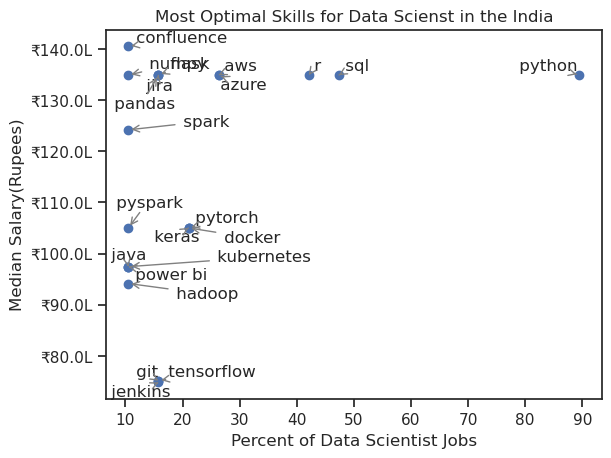

In [24]:
from adjustText import adjust_text

# Set font family that supports ₹
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.scatter(df_ds_skills_high_demand['skill_percent'],df_ds_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary(Rupees)')
plt.title('Most Optimal Skills for Data Scienst in the India')

#get current axes, set limits and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'₹{y / 1e5:.1f}L'))

#add lables to pints and collect them in list
texts = []
for i, txt in enumerate(df_ds_skills_high_demand.index):
    texts.append(plt.text(df_ds_skills_high_demand['skill_percent'].iloc[i],df_ds_skills_high_demand['median_salary'].iloc[i]," "+ txt))

#adjust text to avoid overlap and add arrows
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))

plt.show()

#### Coloring by Technology

In [10]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'cognos',
  'microstrategy',
  'splunk',
  'tableau',
  'spreadsheet',
  'datarobot',
  'sas',
  'sharepoint',
  'visio',
  'ssrs',
  'dax',
  'spss',
  'nuix',
  'sheets',
  'excel',
  'ms access',
  'qlik',
  'powerpoint',
  'alteryx',
  'msaccess',
  'powerbi',
  'power bi',
  'outlook',
  'esquisse',
  'word',
  'ssis',
  'looker'],
 'programming': ['php',
  'vba',
  'ruby',
  'shell',
  'vb.net',
  'erlang',
  'julia',
  'java',
  'dart',
  'html',
  'pascal',
  'sas',
  'swift',
  'no-sql',
  'javascript',
  'haskell',
  'lua',
  'objective-c',
  'fortran',
  'sass',
  'matlab',
  'bash',
  'go',
  'clojure',
  'c#',
  'perl',
  'cobol',
  'apl',
  't-sql',
  'visual basic',
  'scala',
  'css',
  'crystal',
  'ocaml',
  'assembly',
  'mongodb',
  'kotlin',
  'visualbasic',
  'c',
  'solidity',
  'groovy',
  'elixir',
  'lisp',
  'golang',
  'c++',
  'powershell',
  'typescript',
  'nosql',
  'rust',
  'delphi',
  'f#',
  'python',
  'r',
  'sql',
  'mo

In [ ]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,cognos
0,analyst_tools,microstrategy
0,analyst_tools,splunk
0,analyst_tools,tableau
0,analyst_tools,spreadsheet
0,analyst_tools,datarobot
0,analyst_tools,sas
0,analyst_tools,sharepoint
0,analyst_tools,visio


In [12]:
# merge df_ds_skills and df_technology
df_ds_skills_tech = df_ds_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_ds_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,17,"13,492,411.00",89.47,programming,python
1,9,"13,492,411.00",47.37,programming,sql
2,8,"13,492,411.00",42.11,programming,r
3,5,"13,492,411.00",26.32,cloud,aws
4,5,"13,492,411.00",26.32,cloud,azure
5,4,"10,502,878.00",21.05,libraries,pytorch
6,4,"10,502,878.00",21.05,libraries,keras
7,4,"10,502,878.00",21.05,other,docker
8,3,"7,513,345.00",15.79,other,git
9,3,"13,492,411.00",15.79,webframeworks,flask


In [13]:
df_ds_skills_tech_high_demand = df_ds_skills_tech[df_ds_skills_tech['skill_percent'] > skill_limit]


Plot the results in a scatter plot, coloring the points based on the 'technology' column.

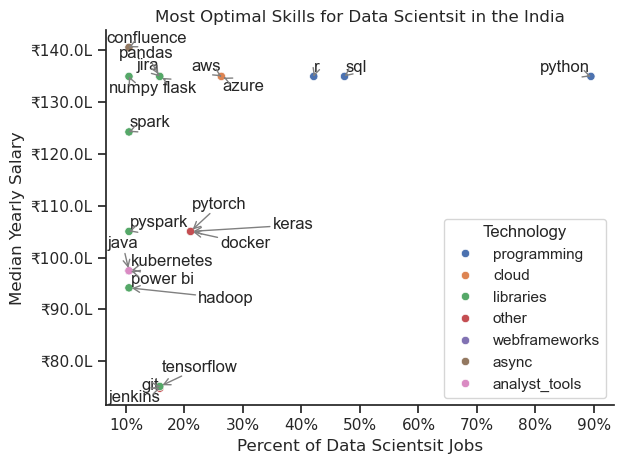

In [25]:
# Set font family that supports ₹
plt.rcParams['font.family'] = 'DejaVu Sans'

sns.scatterplot(
    data=df_ds_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_ds_skills_high_demand.index):
    texts.append(plt.text(df_ds_skills_high_demand['skill_percent'].iloc[i], df_ds_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Scientsit Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Scientsit in the India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'₹{y / 1e5:.1f}L'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()